In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import ast
import lightgbm as lgb
#import xgboost as xgb
from sklearn import feature_extraction
from sklearn import preprocessing
from datetime import datetime
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
#from keras import layers
#from keras import models
from sklearn.preprocessing import LabelEncoder
#from keras import regularizers
#from keras.metrics import mean_squared_logarithmic_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [54]:
data=pd.read_csv('/kaggle/input/movie-revenue2/final_data.csv')

print(data.shape)

(1566, 15)


In [ ]:
data.info()

In [ ]:
data.shape

In [19]:
data.head()

Unnamed: 0                    Release Group       Domestic Distributor  \
0           0  Godzilla x Kong: The New Empire               Warner Bros.   
1           1                  Kung Fu Panda 4         Universal Pictures   
2           2      Ghostbusters: Frozen Empire    Sony Pictures Releasing   
3           3             Bob Marley: One Love         Paramount Pictures   
4           4                    The Beekeeper  Metro-Goldwyn-Mayer (MGM)   

  Earliest Release date Earliest Release region   MPAA Running Time  \
0        March 27, 2024                    APAC  PG-13  1 hr 55 min   
1         March 6, 2024              APAC, EMEA     PG  1 hr 34 min   
2        March 20, 2024               Indonesia  PG-13  1 hr 55 min   
3     February 14, 2024              11 markets  PG-13  1 hr 47 min   
4      January 10, 2024                 Belgium      R  1 hr 45 min   

                                              Genres  \
0      ['Action', 'Adventure', 'Sci-Fi', 'Thriller']   
1  ['Action', 'Adventure', 'Animation', 'Comedy',...   
2       ['Adventure', 'Comedy', 'Fantasy', 'Sci-Fi']   
3                    ['Biography', 'Drama', 'Music']   
4                             ['Action', 'Thriller']   

                                            Overview  \
0  Two ancient titans, Godzilla and Kong, clash i...   
1  After Po is tapped to become the Spiritual Lea...   
2  When the discovery of an ancient artifact unle...   
3  The story of how reggae icon Bob Marley overca...   
4  One man's brutal campaign for vengeance takes ...   

                                              Actors  \
0  ['Rebecca Hall', 'Brian Tyree Henry', 'Dan Ste...   
1  ['Jack Black', 'Awkwafina', 'Viola Davis', 'Du...   
2  ['Paul Rudd', 'Carrie Coon', 'Finn Wolfhard', ...   
3  ['Kingsley Ben-Adir', 'Lashana Lynch', 'James ...   
4  ['Jason Statham', 'Emmy Raver-Lampman', 'Bobby...   

                                         Film makers    Worldwide  \
0  ['Adam Wingard', 'Terry Rossio', 'Simon Barret...  489580032.0   
1  ['Mike Mitchell', 'Stephanie Stine', 'Jonathan...  482850846.0   
2  ['Gil Kenan', 'Gil Kenan', 'Jason Reitman', 'I...  177549359.0   
3  ['Reinaldo Marcus Green', 'Terence Winter', 'F...  177193170.0   
4  ['David Ayer', 'Kurt Wimmer', 'David Ayer', 'B...  152720535.0   

      Domestic      Foreign  Year  
0  174480032.0  315100000.0  2024  
1  181449090.0  301401756.0  2024  
2  104137915.0   73411444.0  2024  
3   96893170.0   80300000.0  2024  
4   66220535.0   86500000.0  2024

In [3]:
train, test = train_test_split(data, test_size=0.2)

In [4]:
train = train.reset_index()


In [5]:
test = test.reset_index()

In [ ]:
train.head()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

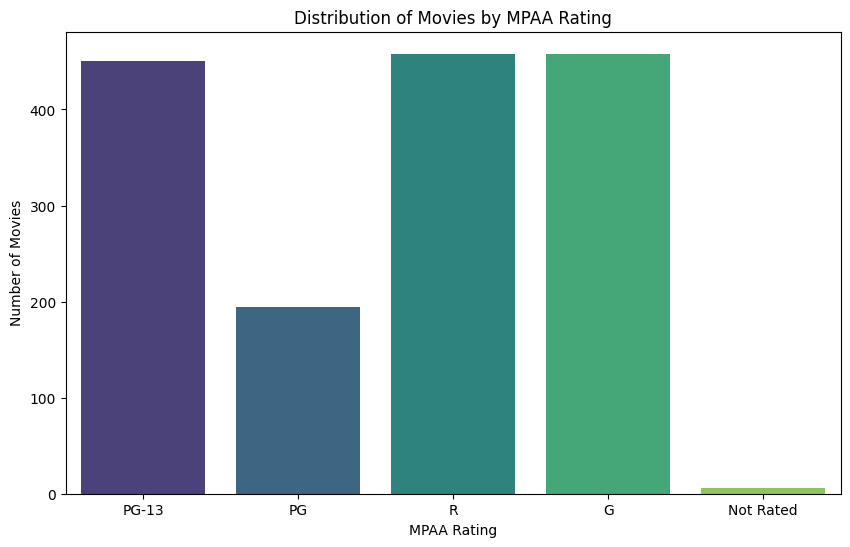

In [21]:

# Plot 1: Distribution of Movies by MPAA Rating
plt.figure(figsize=(10, 6))
sns.countplot(x='MPAA', data=data, palette='viridis')
plt.title('Distribution of Movies by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Number of Movies')
plt.show()

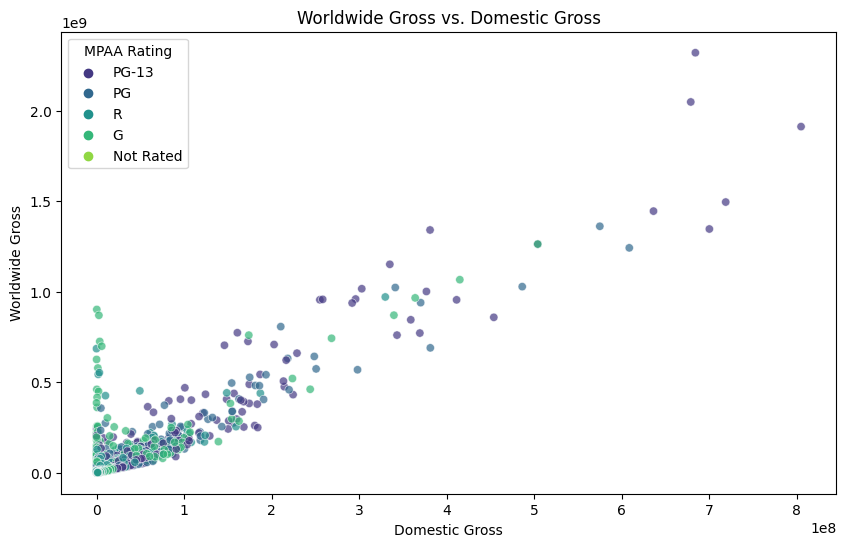

In [22]:
# Plot 2: Worldwide Gross vs. Domestic Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Domestic', y='Worldwide', hue='MPAA', data=data, palette='viridis', alpha=0.7)
plt.title('Worldwide Gross vs. Domestic Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Worldwide Gross')
plt.legend(title='MPAA Rating')
plt.show()

In [77]:
# Function to convert '1 hr 55 min' to minutes
def convert_running_time(time_str):
    parts = time_str.split()
    if (parts[1] == 'hr'):
        if ( len(parts) > 2): 
            hours = int(parts[0]) * 60
            minutes = int(parts[2])
        else:
            return int(parts[0]) * 60
    else :
        return int(parts[0])
    
    return hours + minutes

In [78]:
# Apply the conversion function to the 'Running Time' column
data['minutes'] = data['Running Time'].apply(convert_running_time)
data['minutes']

0       115
1        94
2       115
3       107
4       105
       ... 
1561     92
1562    100
1563    112
1564     94
1565     87
Name: minutes, Length: 1566, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


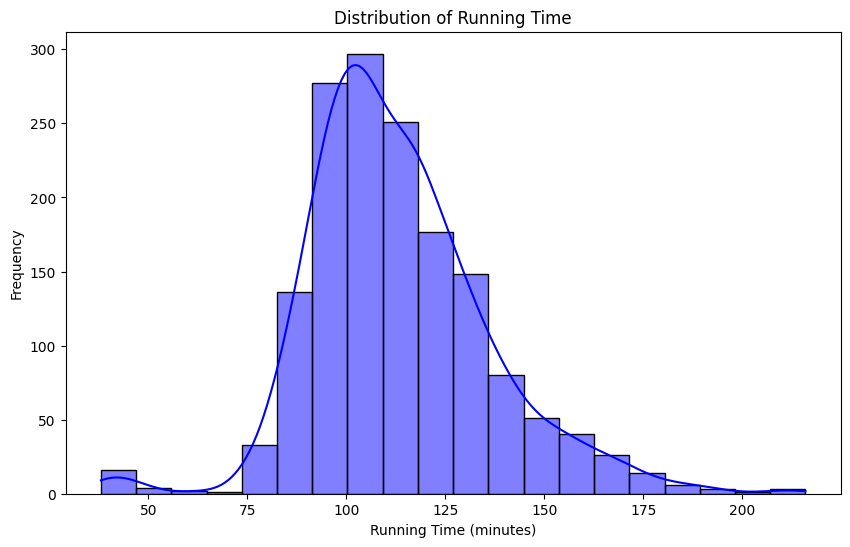

In [79]:
# Plot 3: Distribution of Running Time
plt.figure(figsize=(10, 6))
sns.histplot(data['minutes'], bins=20, kde=True, color='blue')
plt.title('Distribution of Running Time')
plt.xlabel('Running Time (minutes)')
plt.ylabel('Frequency')
plt.show()


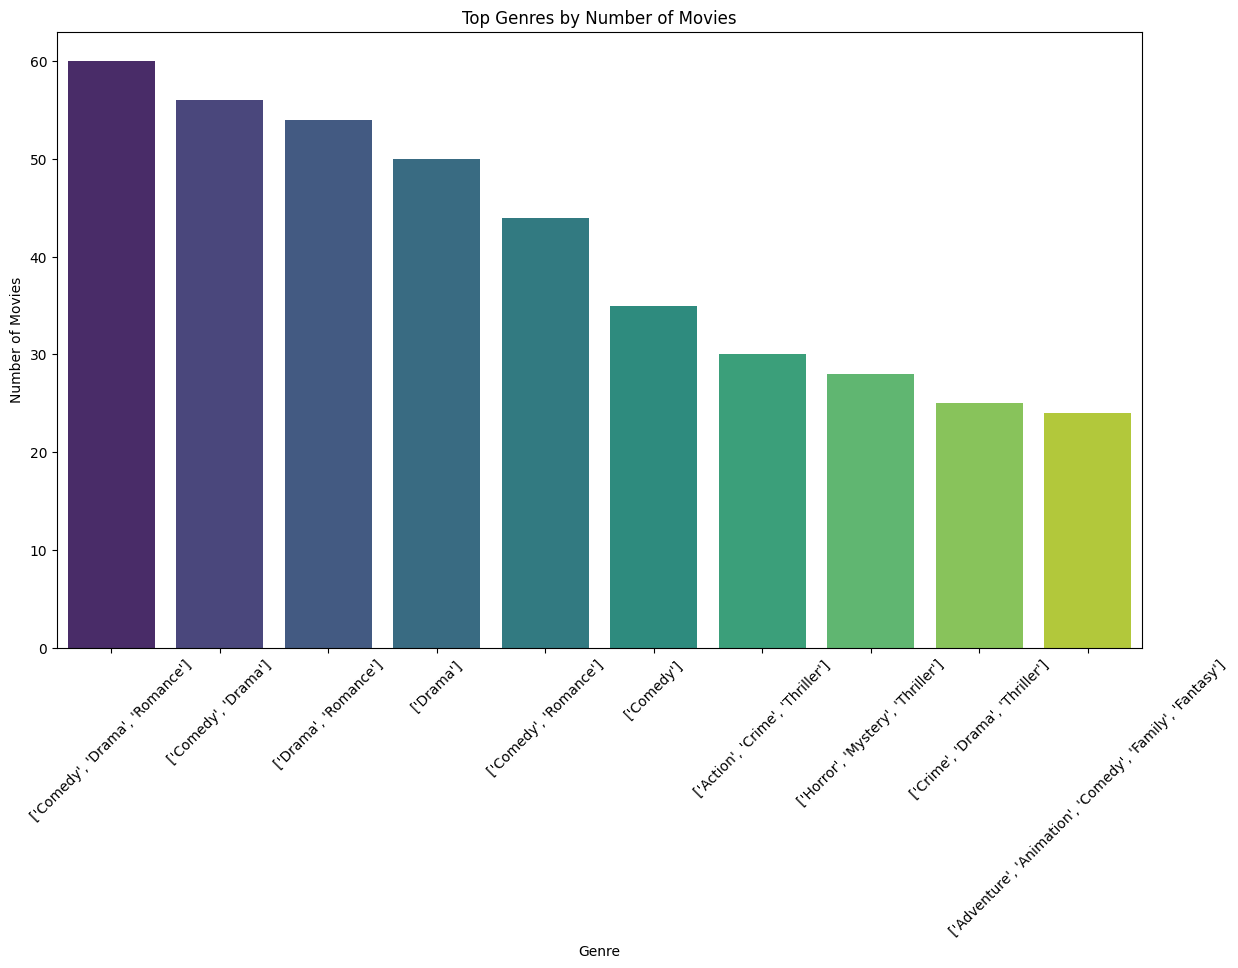

In [80]:
# 4. Top Genres by Number of Movies
plt.figure(figsize=(14, 8))
genres_exploded = data['Genres'].explode()
top_genres = genres_exploded.value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top Genres by Number of Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

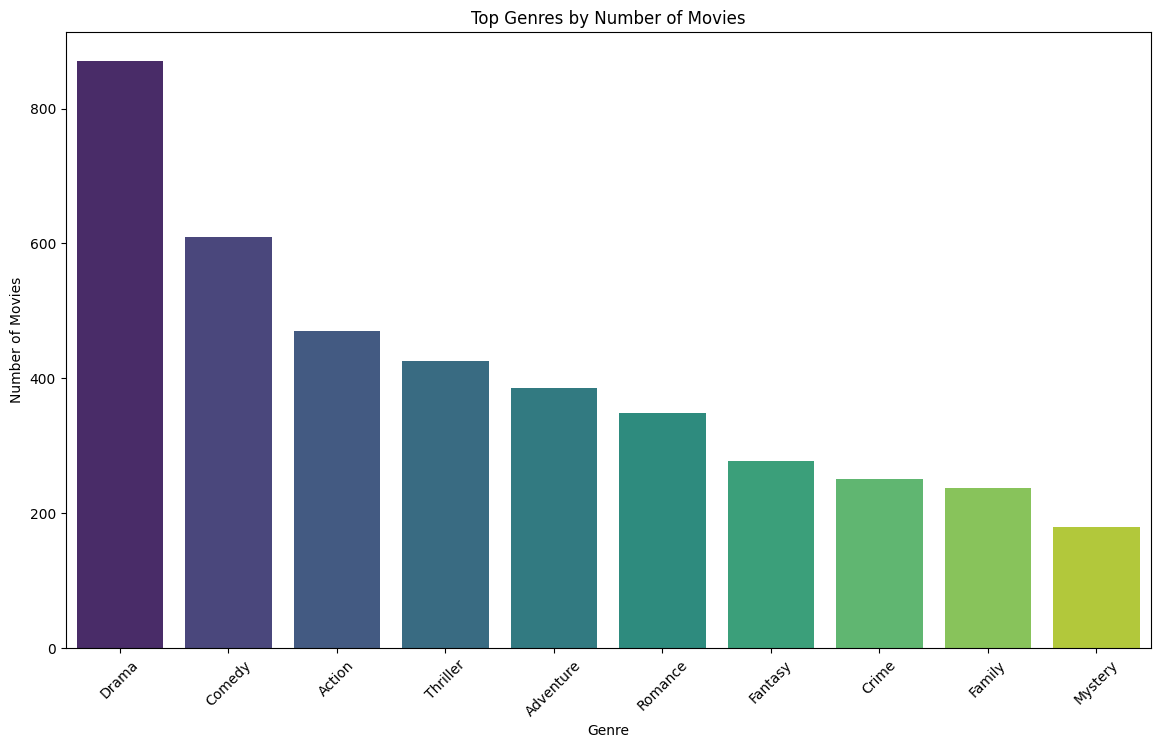

In [81]:
data['genres'] = data['Genres'].apply(ast.literal_eval)

# Explode the genres into separate rows
genres_exploded = data.explode('genres')

# Plot 4: Top Genres by Number of Movies
plt.figure(figsize=(14, 8))
top_genres = genres_exploded['genres'].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top Genres by Number of Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

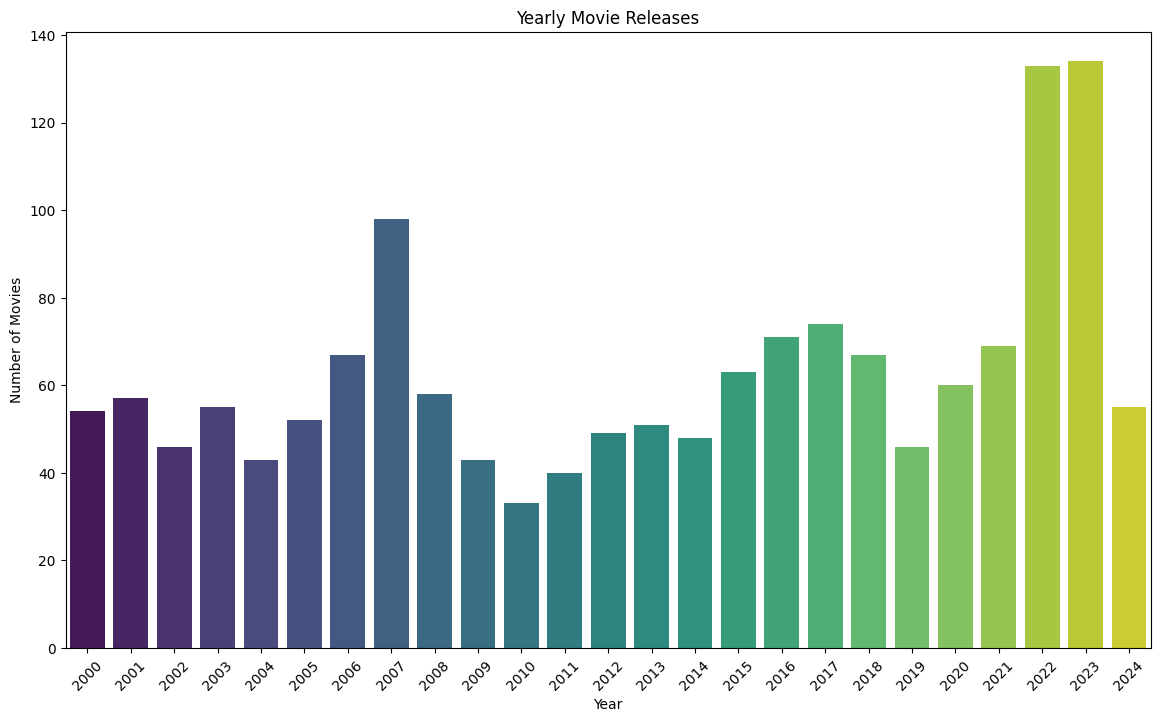

In [25]:
# Plot 5: Yearly Movie Releases
plt.figure(figsize=(14, 8))
sns.countplot(x='Year', data=data, palette='viridis')
plt.title('Yearly Movie Releases')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

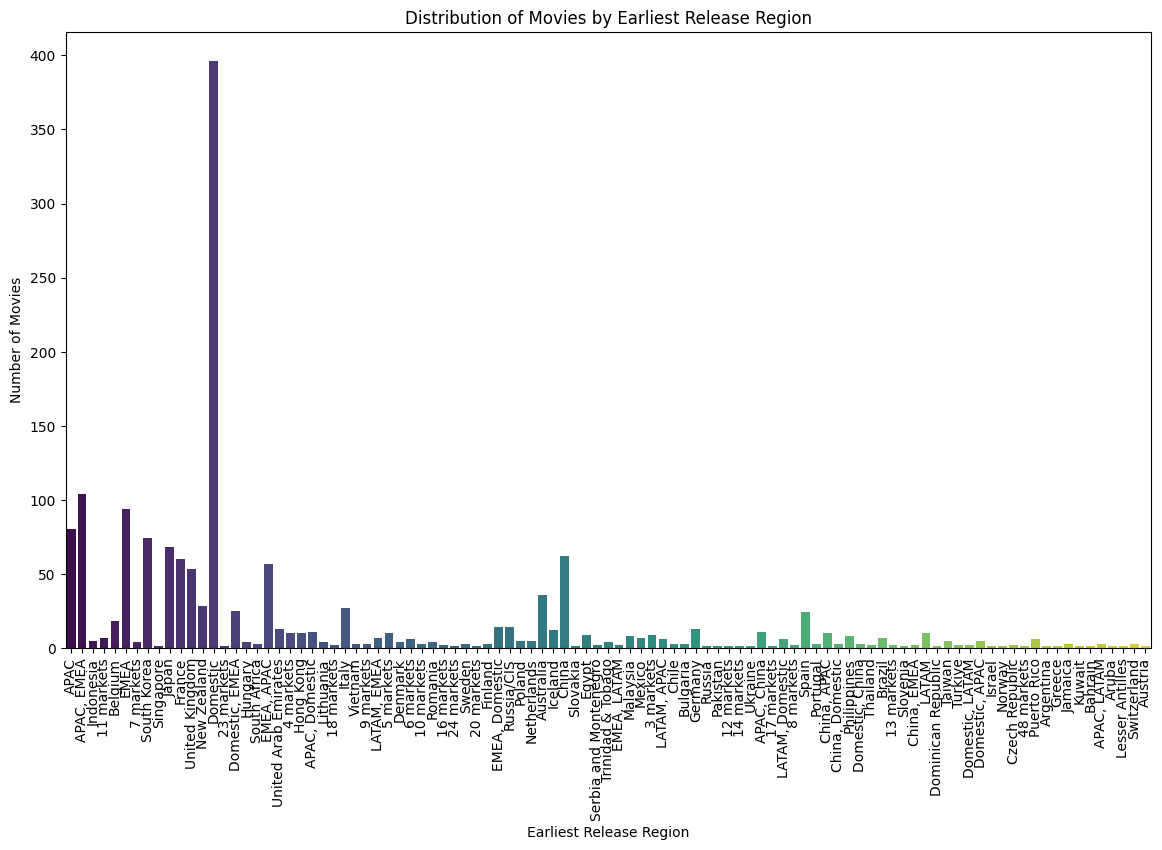

In [83]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Earliest Release region', data=data, palette='viridis')
plt.title('Distribution of Movies by Earliest Release Region')
plt.xlabel('Earliest Release Region')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

In [92]:
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except:
        return []
    
# Convert the list columns
list_columns = ['Genres', 'Film makers', 'Actors', 'Earliest Release region']
for col in list_columns:
    data[col] = data[col].apply(safe_literal_eval)

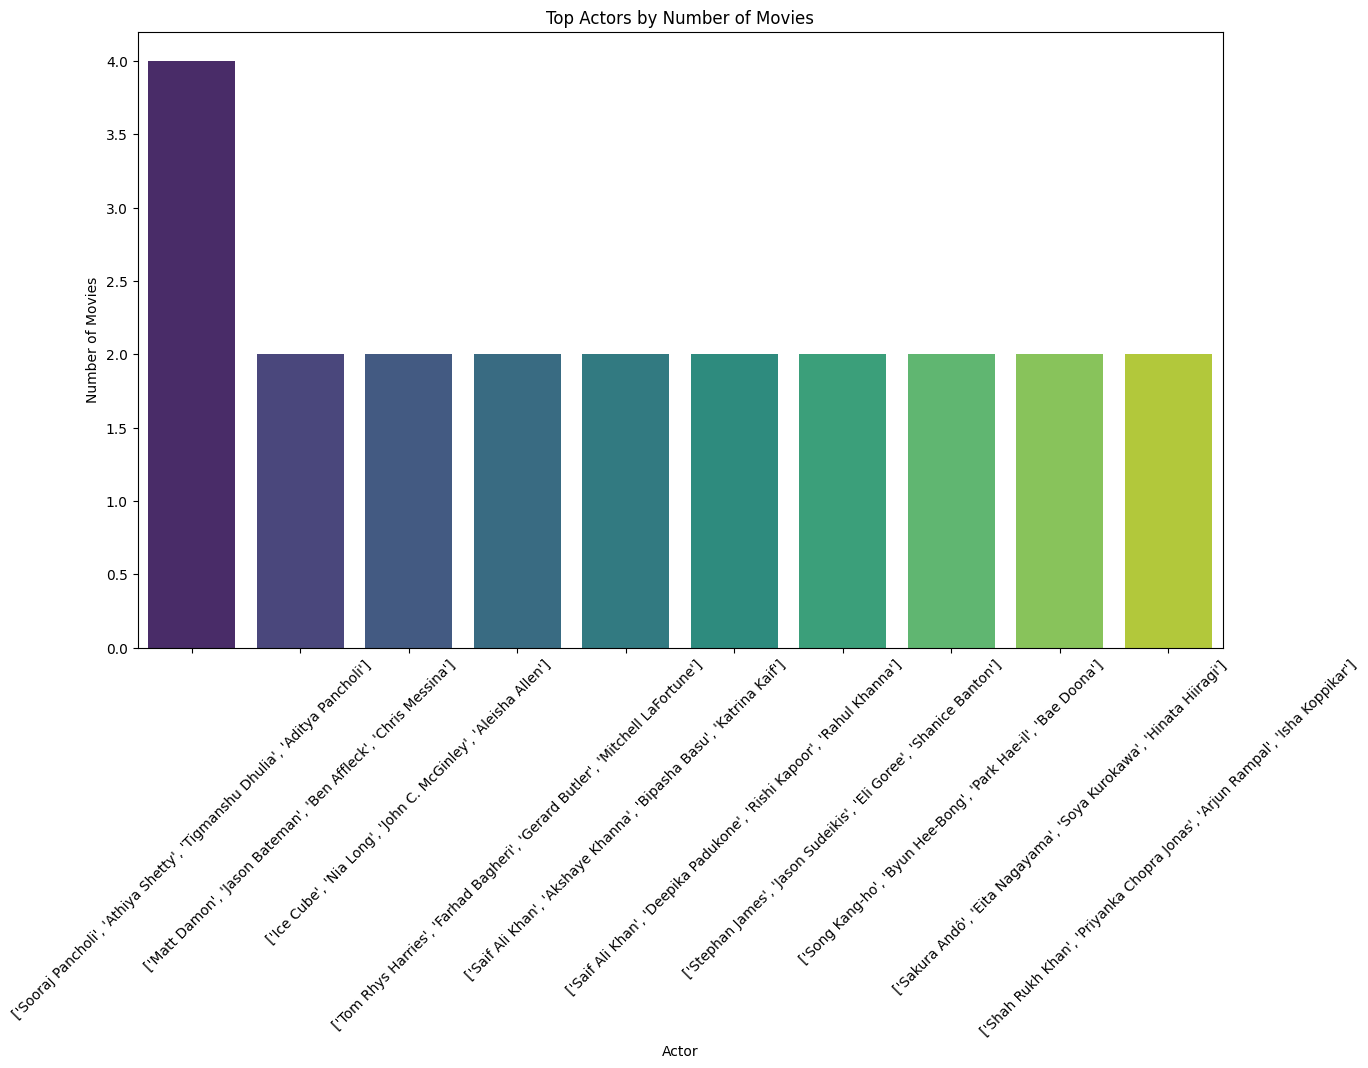

In [99]:
# 8. Top Actors by Number of Movies
plt.figure(figsize=(14, 8))
top_actors = df_exploded_actors['Actors'].value_counts().head(10)
sns.barplot(x=top_actors.index, y=top_actors.values, palette='viridis')
plt.title('Top Actors by Number of Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

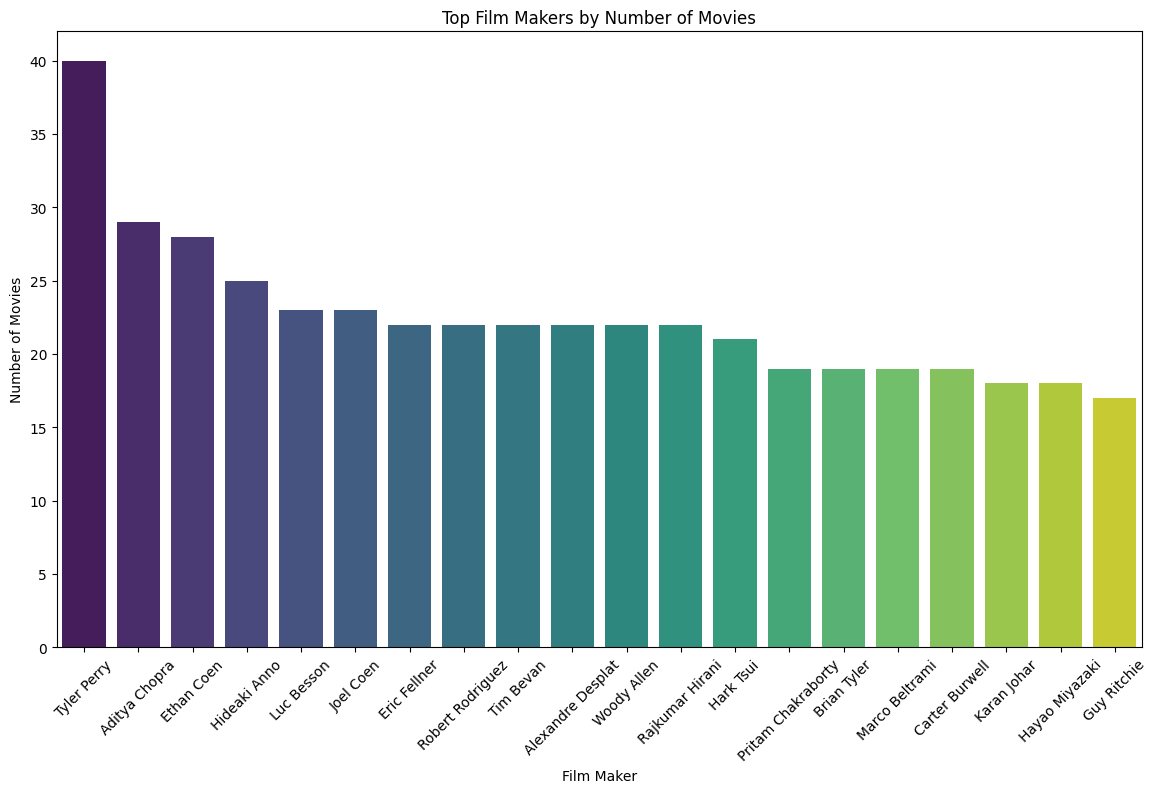

In [100]:
# 9. Top Film Makers by Number of Movies
plt.figure(figsize=(14, 8))
film_makers_exploded = data['Film makers'].explode()
top_film_makers = film_makers_exploded.value_counts().head(20)
sns.barplot(x=top_film_makers.index, y=top_film_makers.values, palette='viridis')
plt.title('Top Film Makers by Number of Movies')
plt.xlabel('Film Maker')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

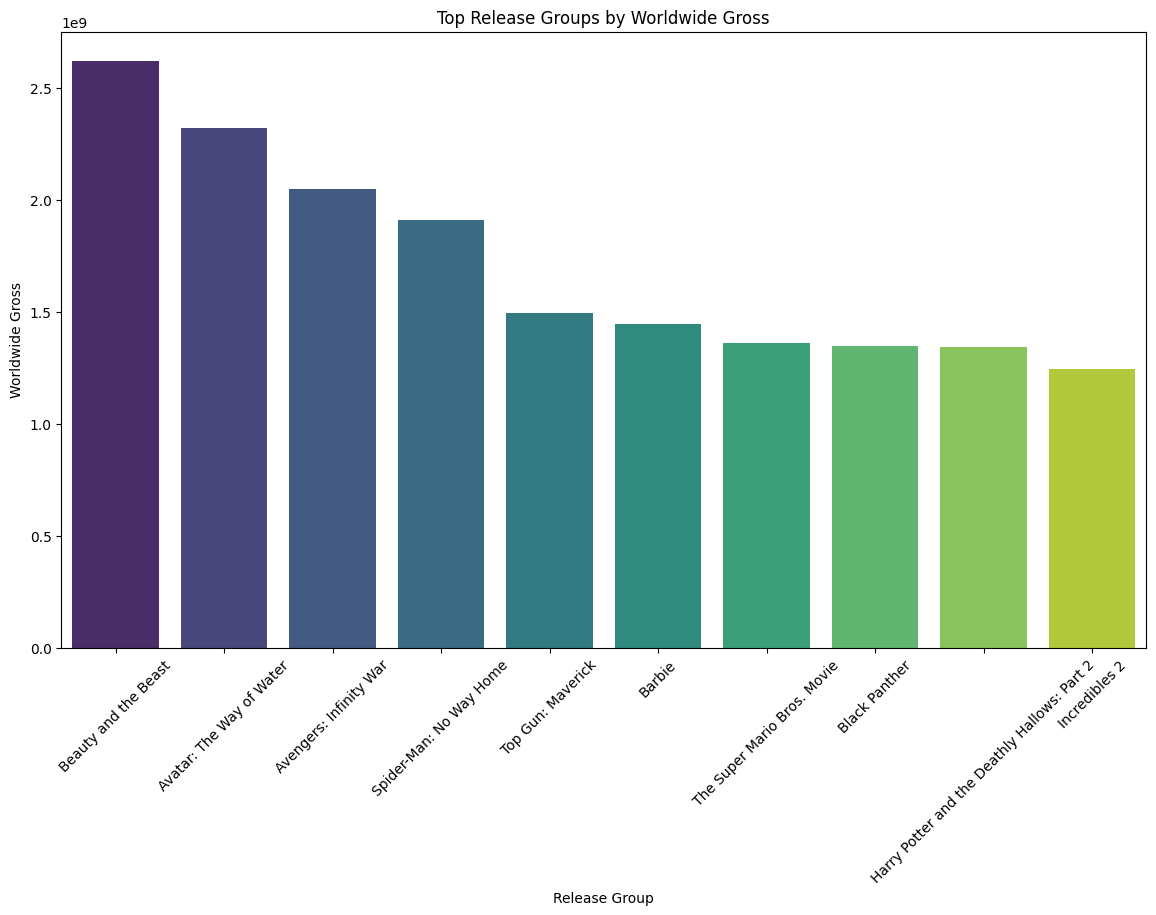

In [101]:
# 12. Release Group vs. Worldwide Gross
plt.figure(figsize=(14, 8))
top_release_groups = data.groupby('Release Group')['Worldwide'].sum().nlargest(10)
sns.barplot(x=top_release_groups.index, y=top_release_groups.values, palette='viridis')
plt.title('Top Release Groups by Worldwide Gross')
plt.xlabel('Release Group')
plt.ylabel('Worldwide Gross')
plt.xticks(rotation=45)
plt.show()